# **Comparison of skin friction Cf for the new solver**

## Sigmoid and max function

1. Original wall function
2. Only wall correction
3. Use max function (Option 1)
```
nuEff[oppFaceIDs[faceI]] = max(nu_*(-dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL), nuEff[oppFaceIDs[faceI]]);
```
4. Use sigmoid function and blending (Option 2)
```
scalar yPlusFace = dist_fface[faceI]*uTau[faceI]/nu_;
scalar w = 1/(1 + Foam::exp(-0.05*(200 - yPlusFace))); // Sigmoid function
nuEff[oppFaceIDs[faceI]] = w*nuEff[oppFaceIDs[faceI]] + (1-w) * nu_*(-dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL);
```

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_onlywall = [run + 'turbulentFlatPlate_wmSF_onlywall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_onlywall = [pd.read_csv(tauw_path_onlywall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_onlywall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.000001,0.000014,0.000014,-3.481935e+06,-3.481913e+06,6.951925,1,3.481937e+06,3.405406e+06,0.967368,0.009440,1.913472,0.018827,72.322648,72.319905
1,0.001458,0.999999,1.000000,0.000014,0.000014,-1.521458e+06,-1.521459e+06,4.595414,1,1.521458e+06,1.520783e+06,0.422719,0.000059,0.845250,0.000216,5.149157,5.154083
2,0.002433,0.999999,1.000000,0.000014,0.000014,-1.182465e+06,-1.182467e+06,4.051249,1,1.182466e+06,1.182748e+06,0.328534,0.000011,0.657146,0.000043,17.349021,17.350031
3,0.003410,0.999999,1.000000,0.000014,0.000014,-1.061357e+06,-1.061358e+06,3.838180,1,1.061357e+06,1.061417e+06,0.294885,0.000005,0.589787,0.000017,18.885801,18.886208
4,0.004390,0.999999,1.000000,0.000014,0.000014,-9.974168e+05,-9.974183e+05,3.720772,1,9.974171e+05,9.974671e+05,0.277120,0.000003,0.554254,0.000010,20.330157,20.330382


In [5]:
tauw_path_wm = [run + 'turbulentFlatPlate_wmSF_1stface_sigmoid_option1/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm = [pd.read_csv(tauw_path_wm[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,w,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.00113,1.170785e+15,0.000014,1.625049e+10,-2.485060e+08,-2.465364e+08,0.999949,2.35123,1.625049e+10,58.730420,1,2.482256e+08,2.105737e-07,68.966489,1.114043e-04,68.966489,1.114043e-04,113.728342,57.660003
1,0.001458,1.00113,1.514713e+20,0.000014,2.102422e+15,-2.485060e+08,-2.465364e+08,0.999949,2.35123,2.102422e+15,58.730419,1,2.482256e+08,1.627612e-12,68.966487,5.453748e-10,68.966487,5.453748e-10,-16335.136589,-8282.712865
2,0.002433,1.00113,5.913580e+20,0.000014,8.208049e+15,-2.485060e+08,-2.465364e+08,0.999949,2.35123,8.208049e+15,58.730419,1,2.482256e+08,4.168988e-13,68.966487,1.518232e-11,68.966487,1.518232e-11,-0.049403,-0.048338
3,0.003410,1.00113,1.768490e+21,0.000014,2.454664e+16,-2.485060e+08,-2.465364e+08,0.999949,2.35123,2.454664e+16,58.730419,1,2.482256e+08,1.394050e-13,68.966487,2.722122e-14,68.966487,2.722118e-14,-0.033266,-0.030946
4,0.004390,1.00113,9.720789e+21,0.000014,1.349246e+17,-2.485060e+08,-2.465364e+08,0.999949,2.35123,1.349246e+17,58.730419,1,2.482256e+08,2.536177e-14,68.966487,7.996795e-14,68.966487,7.996794e-14,-0.018570,-0.021244


In [6]:
tauw_path_wm2 = [run + 'turbulentFlatPlate_wmSF_1stface_sigmoid/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm2 = [pd.read_csv(tauw_path_wm2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,w,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.0,1.000002,0.000014,0.000014,-3.481935e+06,-3.481912e+06,0.999954,0.278315,2.733566e-11,6.951924,1,3.481936e+06,3.405403e+06,0.967368,0.009440,1.913471,0.018827,72.322972,72.320229
1,0.001458,1.0,1.000000,0.000014,0.000014,-1.521457e+06,-1.521458e+06,0.999954,0.183974,3.333547e-12,4.595413,1,1.521458e+06,1.520783e+06,0.422719,0.000059,0.845250,0.000216,5.149482,5.154408
2,0.002433,1.0,1.000000,0.000014,0.000014,-1.182465e+06,-1.182466e+06,0.999954,0.162189,1.769925e-12,4.051248,1,1.182465e+06,1.182748e+06,0.328534,0.000011,0.657146,0.000043,17.349349,17.350359
3,0.003410,1.0,1.000000,0.000014,0.000014,-1.061356e+06,-1.061357e+06,0.999954,0.153659,1.525951e-12,3.838179,1,1.061356e+06,1.061417e+06,0.294885,0.000005,0.589787,0.000017,18.886127,18.886535
4,0.004390,1.0,1.000000,0.000014,0.000014,-9.974160e+05,-9.974174e+05,0.999954,0.148958,1.357287e-12,3.720770,1,9.974162e+05,9.974672e+05,0.277120,0.000003,0.554254,0.000010,20.330483,20.330709


In [7]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_onlywall = [tauw_data_onlywall[i + len(res_list)*j]['nuEff_wall']*tauw_data_onlywall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wm = [tauw_data_wm[i + len(res_list)*j]['nuEff_wall']*tauw_data_wm[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wm2 = [tauw_data_wm2[i + len(res_list)*j]['nuEff_wall']*tauw_data_wm2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

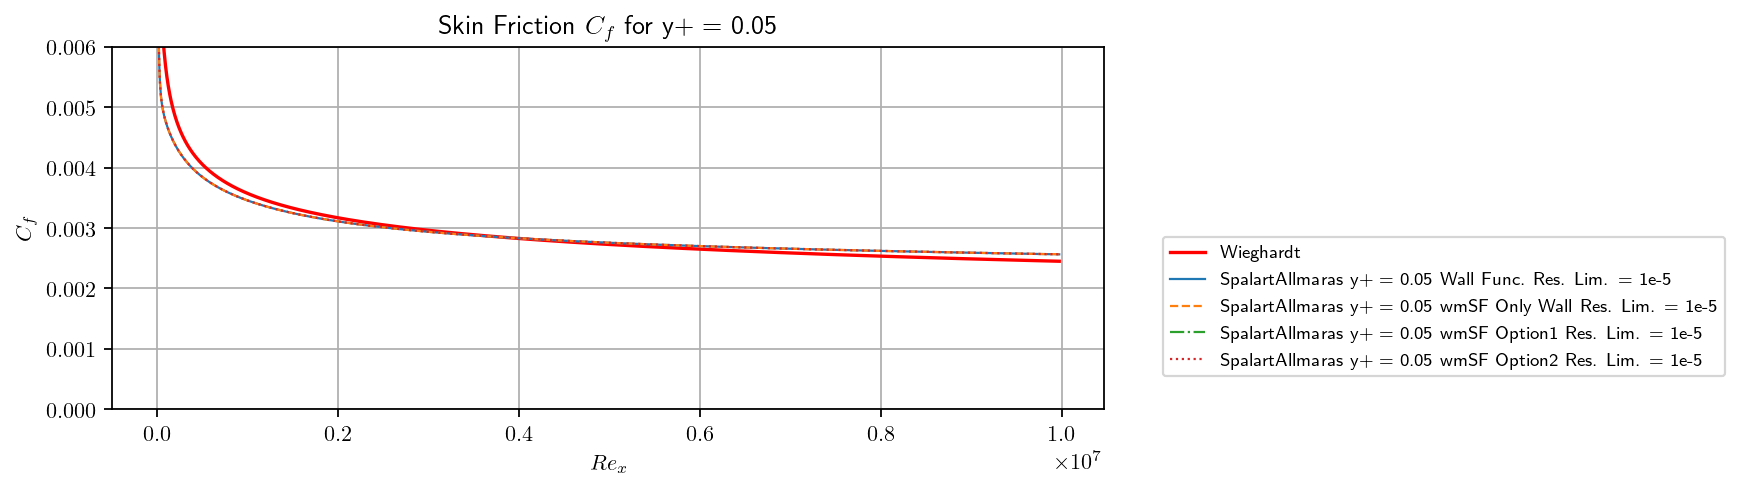

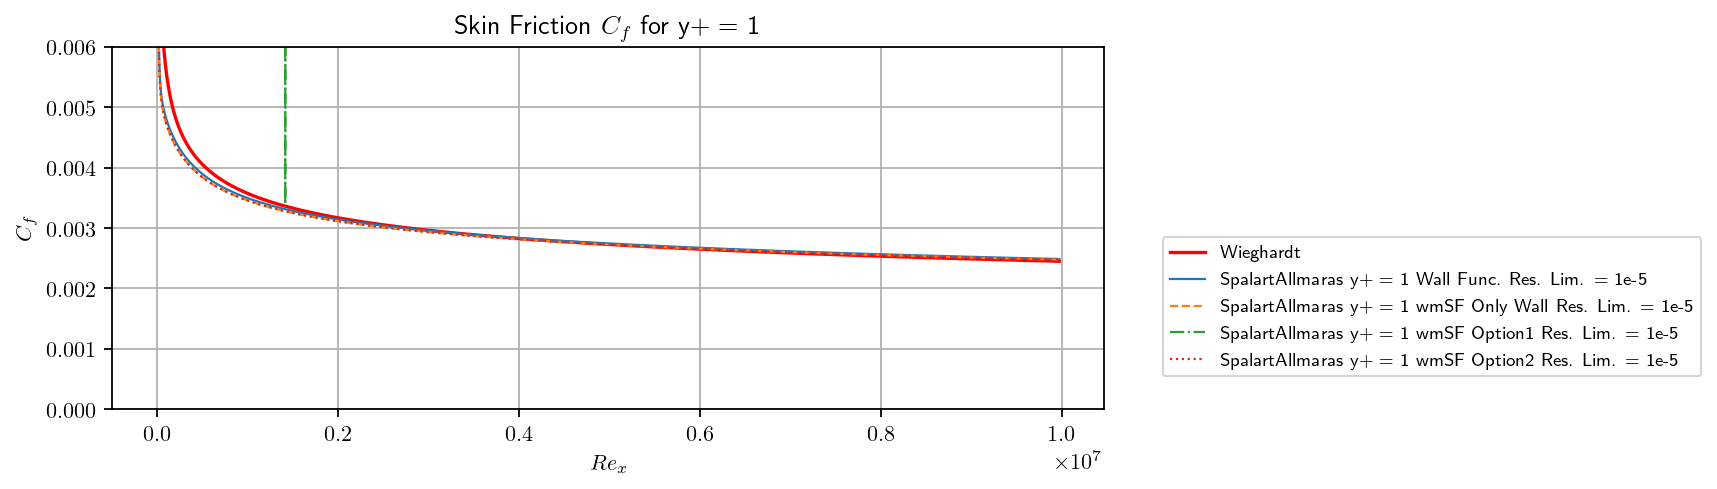

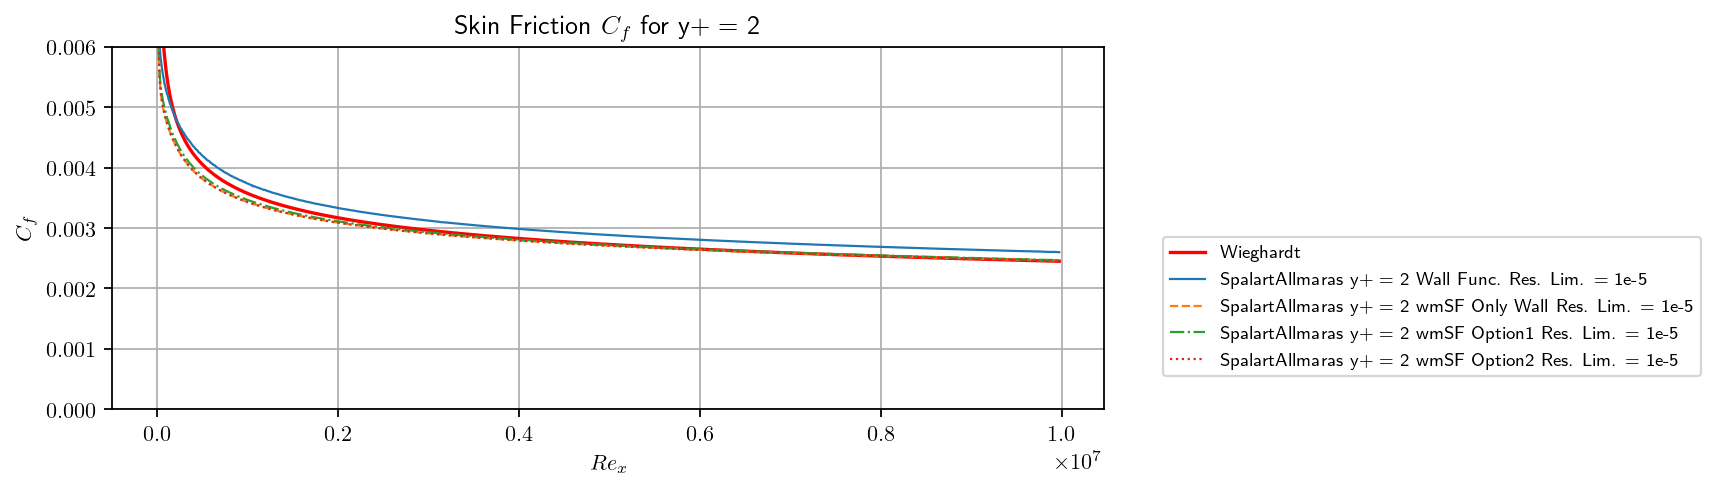

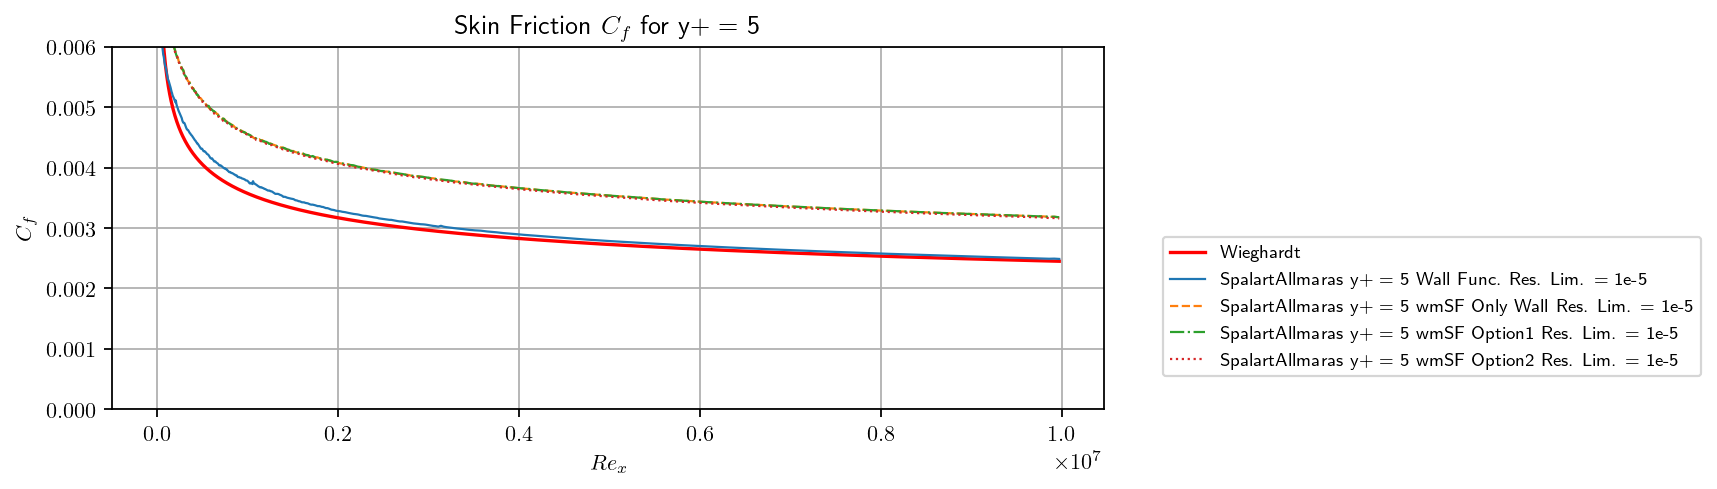

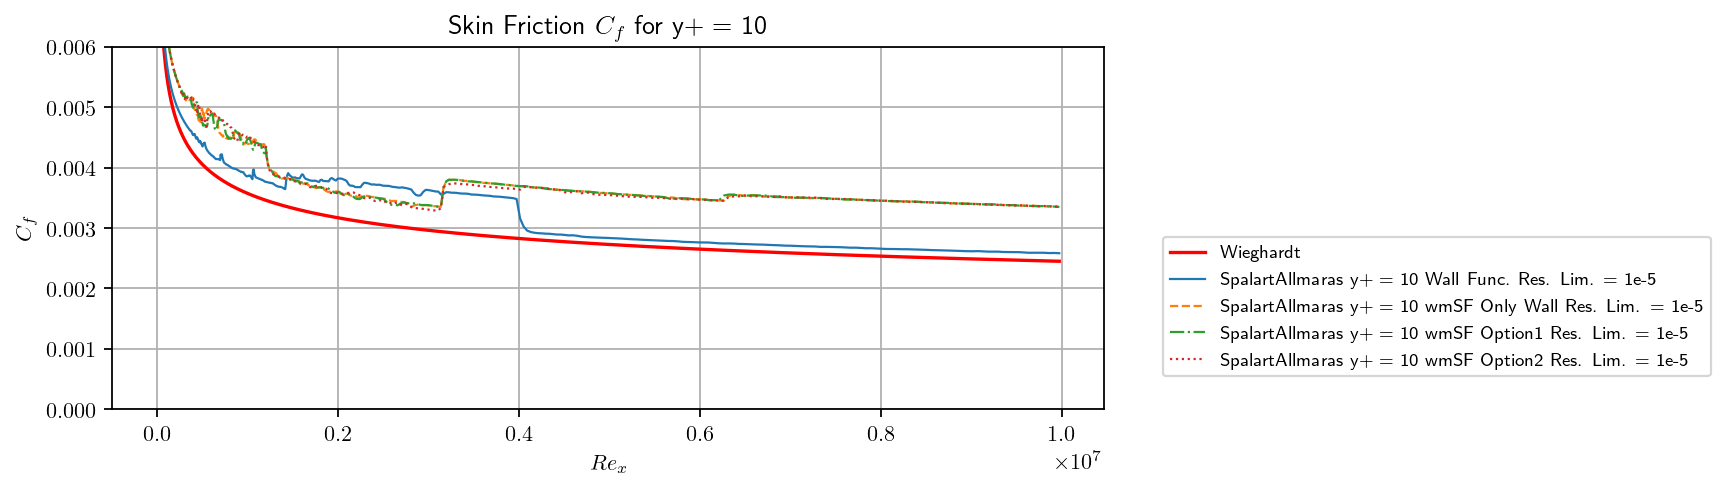

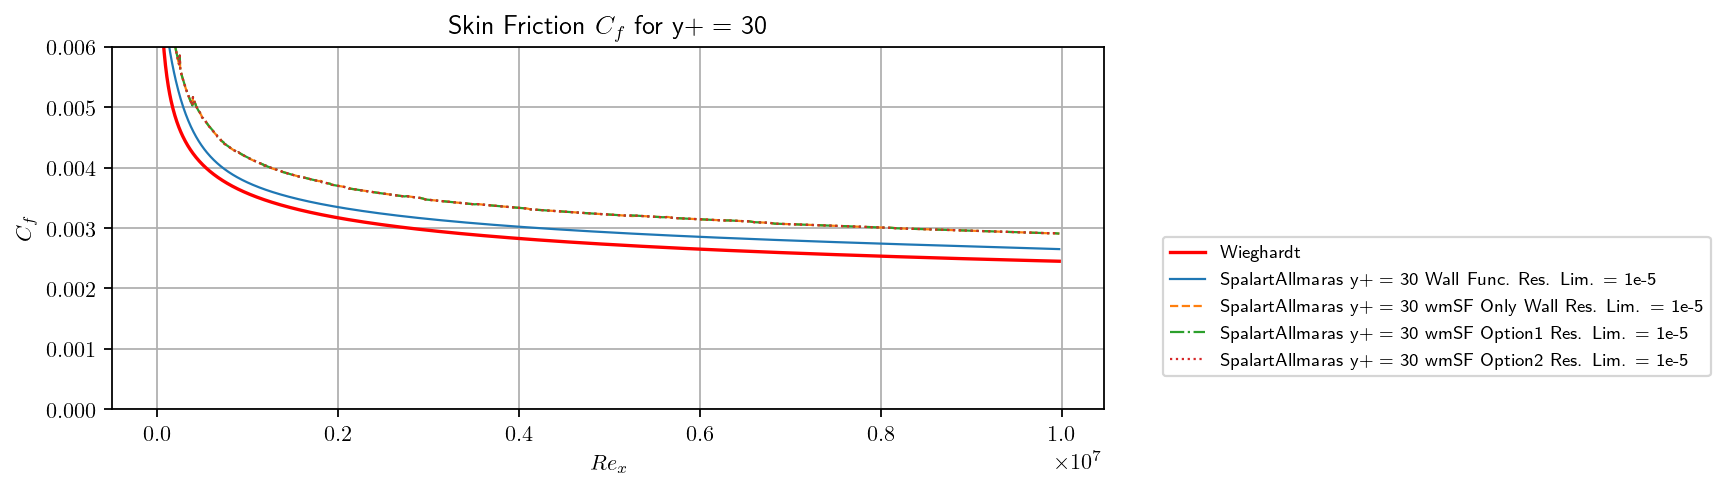

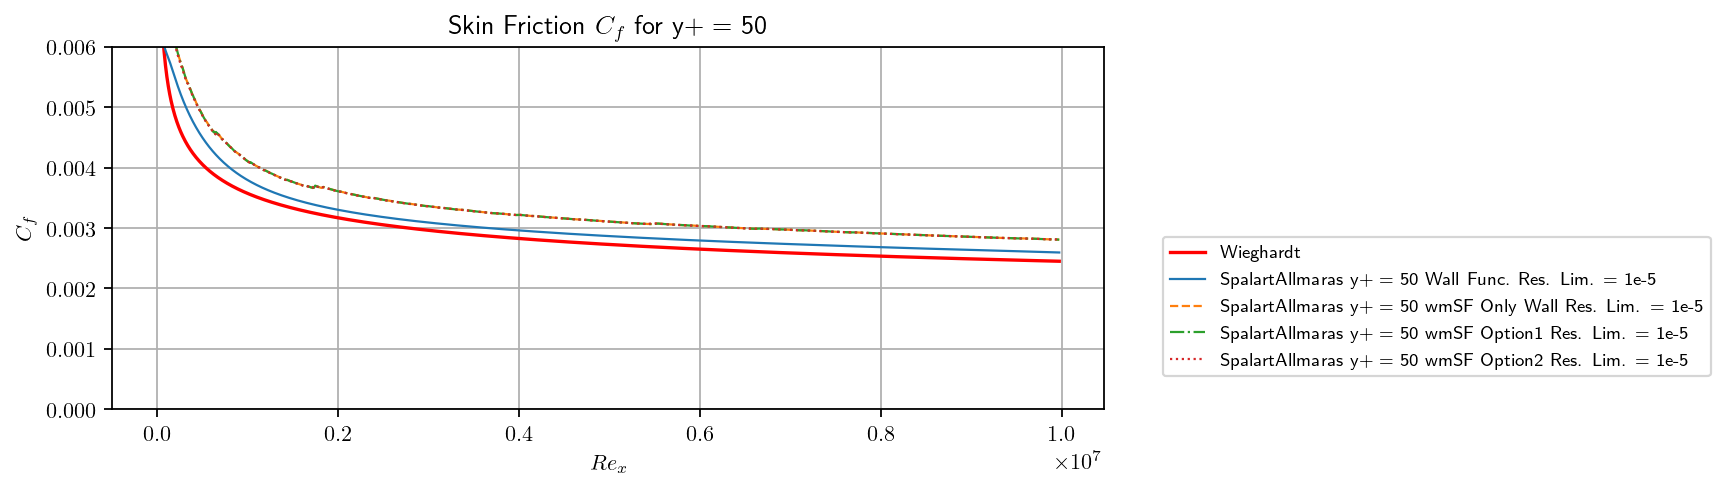

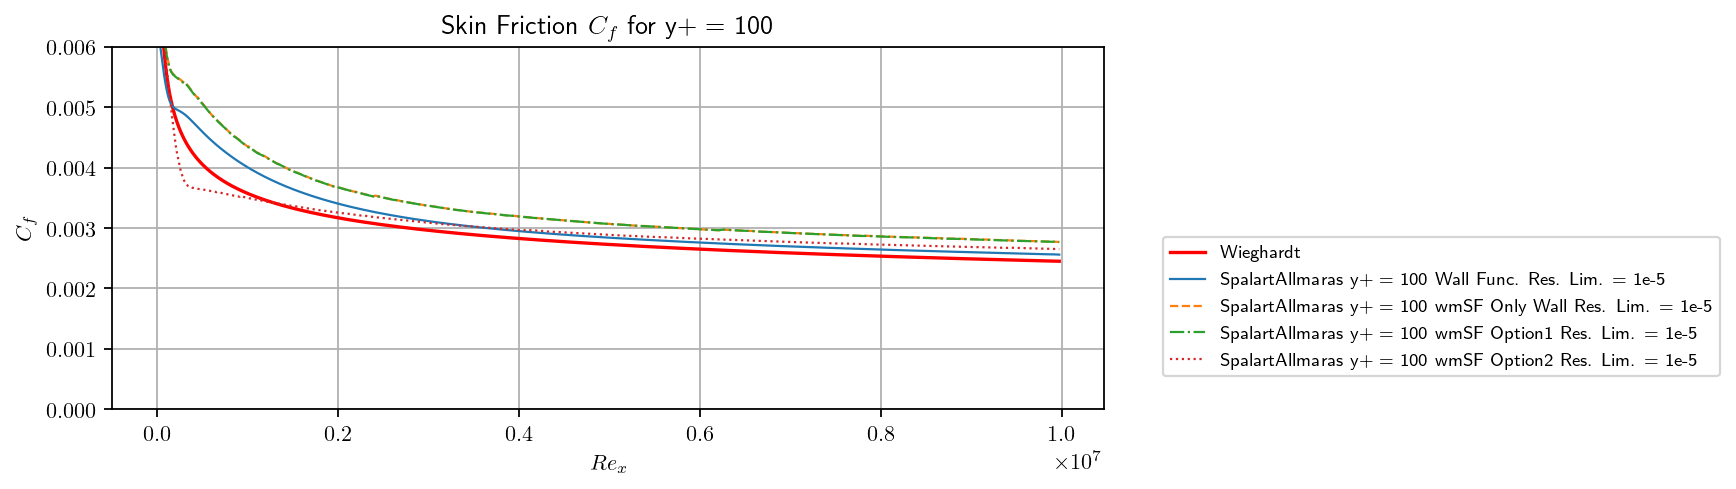

In [9]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Wall Func. Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_onlywall[i + len(res_list)*j], label = "{} y+ = {} wmSF Only Wall Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_wm[i + len(res_list)*j], label = "{} y+ = {} wmSF Option1 Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_wm2[i + len(res_list)*j], label = "{} y+ = {} wmSF Option2 Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        

## w = 0.5 and w = 0.8

1. Original wall function
2. Only wall correction
3. w = 0.5 (Option 1)
```
nuEff[oppFaceIDs[faceI]] = 0.5*nuEff[oppFaceIDs[faceI]] + 0.5 * nu_*(-dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL);
```
4. w = 0.8 (Option 2)
```
nuEff[oppFaceIDs[faceI]] = 0.8*nuEff[oppFaceIDs[faceI]] + 0.2 * nu_*(-dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL);
```

In [10]:
tauw_path_5050 = [run + 'turbulentFlatPlate_wmSF_1stface_5050/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_5050 = [pd.read_csv(tauw_path_5050[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_5050[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,w,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000977,1.012147e+07,0.000014,1.404860e+02,-2.281496e+08,-2.265697e+08,0.5,2.252872,1.404860e+02,56.273580,1,2.279269e+08,1.119253e+01,63.326740,1.029543e-03,63.326741,1.026658e-03,1.067793e+08,1.067887e+08
1,0.001458,1.000978,3.388229e+09,0.000014,4.702862e+04,-2.282154e+08,-2.266342e+08,0.5,2.253197,4.702862e+04,56.281686,1,2.279925e+08,3.344435e-02,63.344955,-4.861627e-06,63.344955,-4.863672e-06,1.068217e+08,1.068225e+08
2,0.002433,1.000978,5.756502e+12,0.000014,7.990025e+07,-2.282093e+08,-2.266283e+08,0.5,2.253167,7.990025e+07,56.280939,1,2.279864e+08,1.968455e-05,63.343276,5.368344e-07,63.343276,5.368312e-07,1.068526e+08,1.068552e+08
3,0.003410,1.000978,8.762658e+15,0.000014,1.216257e+11,-2.282086e+08,-2.266276e+08,0.5,2.253163,1.216257e+11,56.280848,1,2.279857e+08,1.293144e-08,63.343071,6.242379e-08,63.343071,6.242379e-08,1.068882e+08,1.068896e+08
4,0.004390,1.000978,6.832285e+17,0.000014,9.483212e+12,-2.282085e+08,-2.266275e+08,0.5,2.253163,9.483212e+12,56.280841,1,2.279857e+08,1.658504e-10,63.343056,4.367844e-09,63.343056,4.367844e-09,1.069295e+08,1.069296e+08


In [11]:
tauw_path_8020 = [run + 'turbulentFlatPlate_wmSF_1stface_8020/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_8020 = [pd.read_csv(tauw_path_8020[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_8020[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,w,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.0,1.005649,0.000014,0.000014,-3.482254e+06,-3.482231e+06,0.8,0.278328,7.840568e-08,6.952242,1,3.482255e+06,3.386592e+06,0.967456,0.009469,1.908333,0.018831,72.317367,72.314509
1,0.001458,1.0,1.000111,0.000014,0.000014,-1.521325e+06,-1.521326e+06,0.8,0.183966,1.541828e-09,4.595214,1,1.521326e+06,1.520483e+06,0.422682,0.000059,0.845130,0.000215,5.138700,5.143587
2,0.002433,1.0,0.999940,0.000014,0.000014,-1.182439e+06,-1.182441e+06,0.8,0.162187,-8.259683e-10,4.051204,1,1.182440e+06,1.182793e+06,0.328527,0.000011,0.657151,0.000043,17.355383,17.356393
3,0.003410,1.0,0.999986,0.000014,0.000014,-1.061353e+06,-1.061355e+06,0.8,0.153659,-1.929615e-10,3.838174,1,1.061354e+06,1.061429e+06,0.294884,0.000005,0.589789,0.000017,18.888010,18.888417
4,0.004390,1.0,0.999988,0.000014,0.000014,-9.974150e+05,-9.974164e+05,0.8,0.148958,-1.719252e-10,3.720769,1,9.974152e+05,9.974786e+05,0.277120,0.000003,0.554257,0.000010,20.332053,20.332279


In [12]:
Cf_5050 = [tauw_data_5050[i + len(res_list)*j]['nuEff_wall']*tauw_data_5050[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_8020 = [tauw_data_8020[i + len(res_list)*j]['nuEff_wall']*tauw_data_8020[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

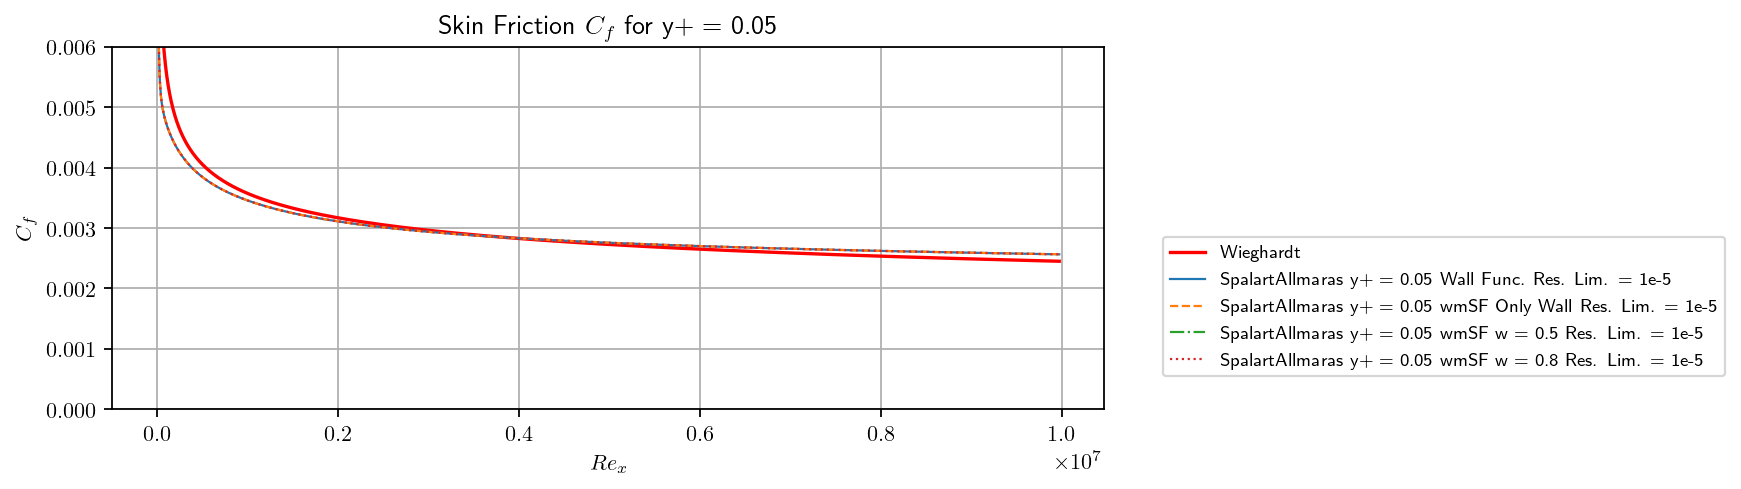

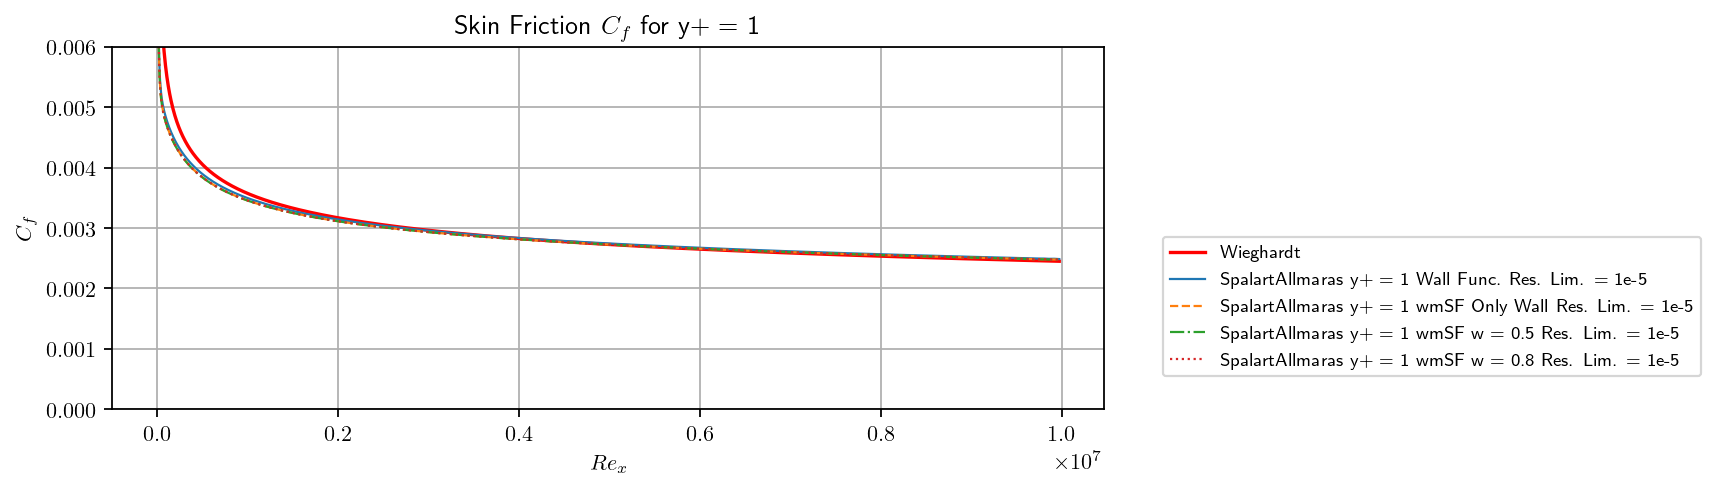

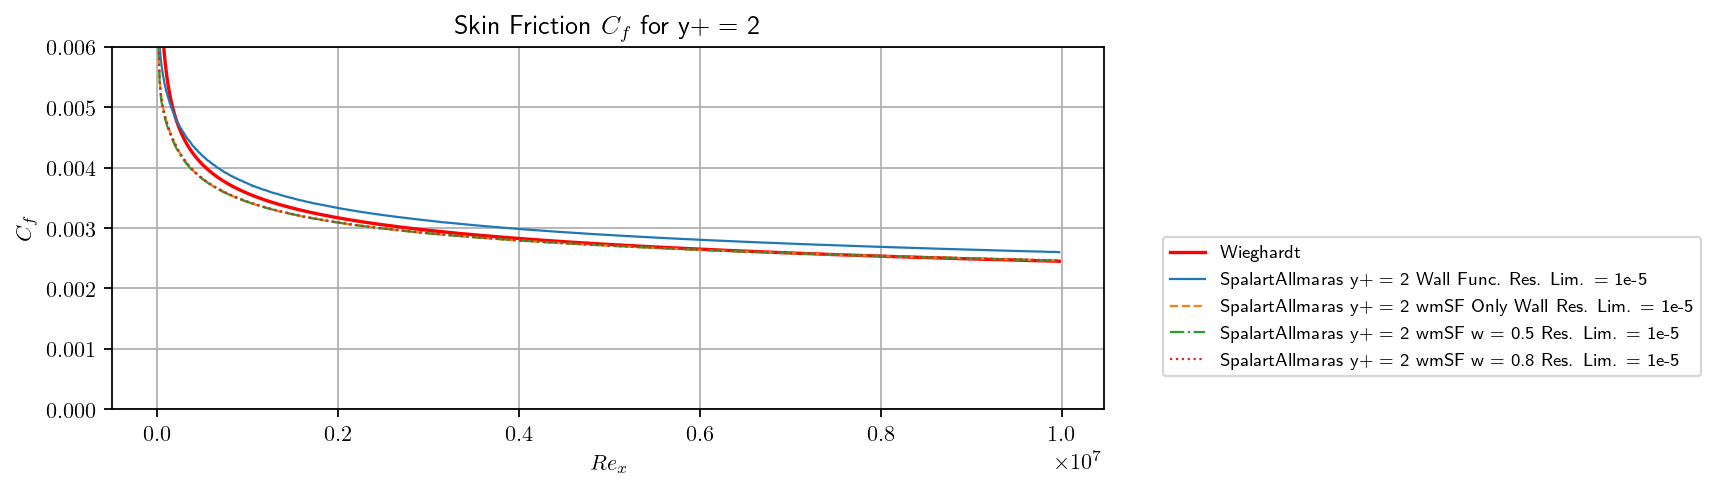

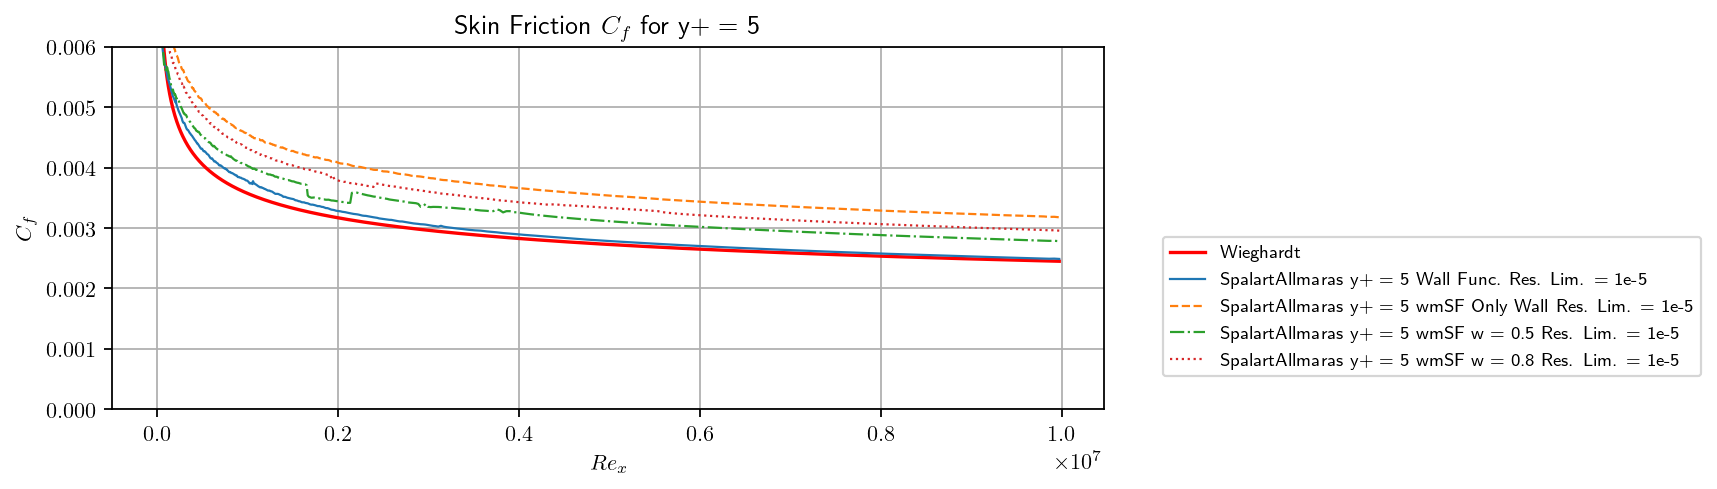

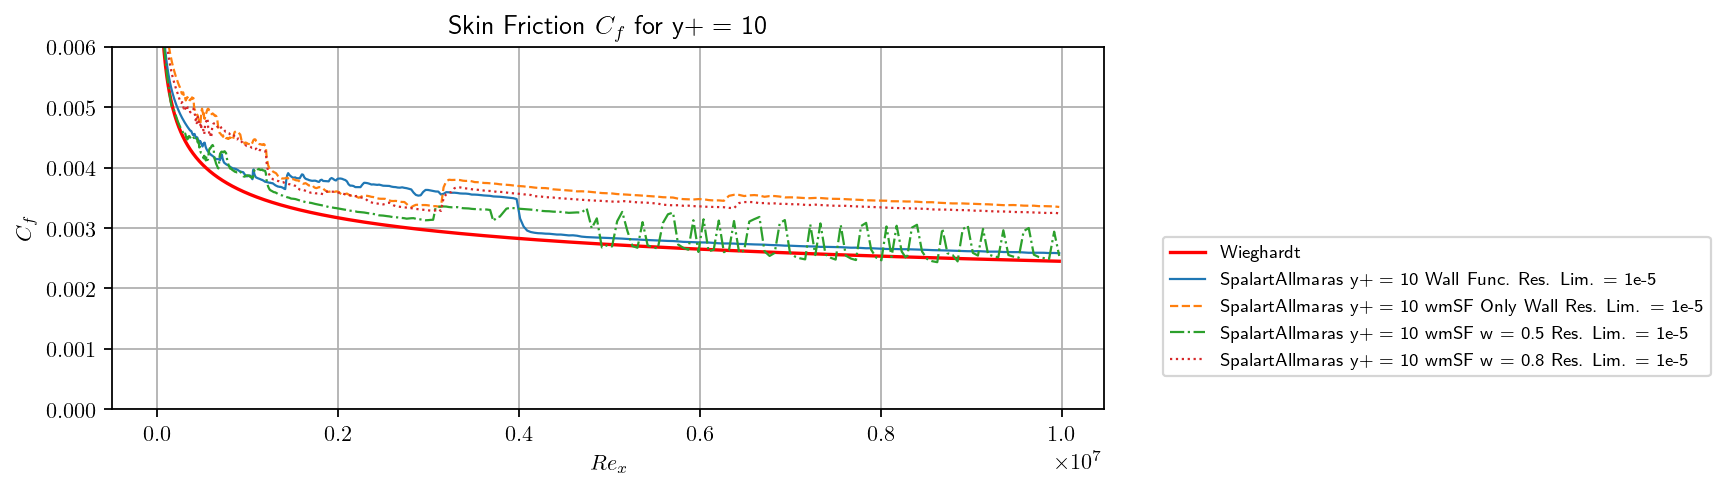

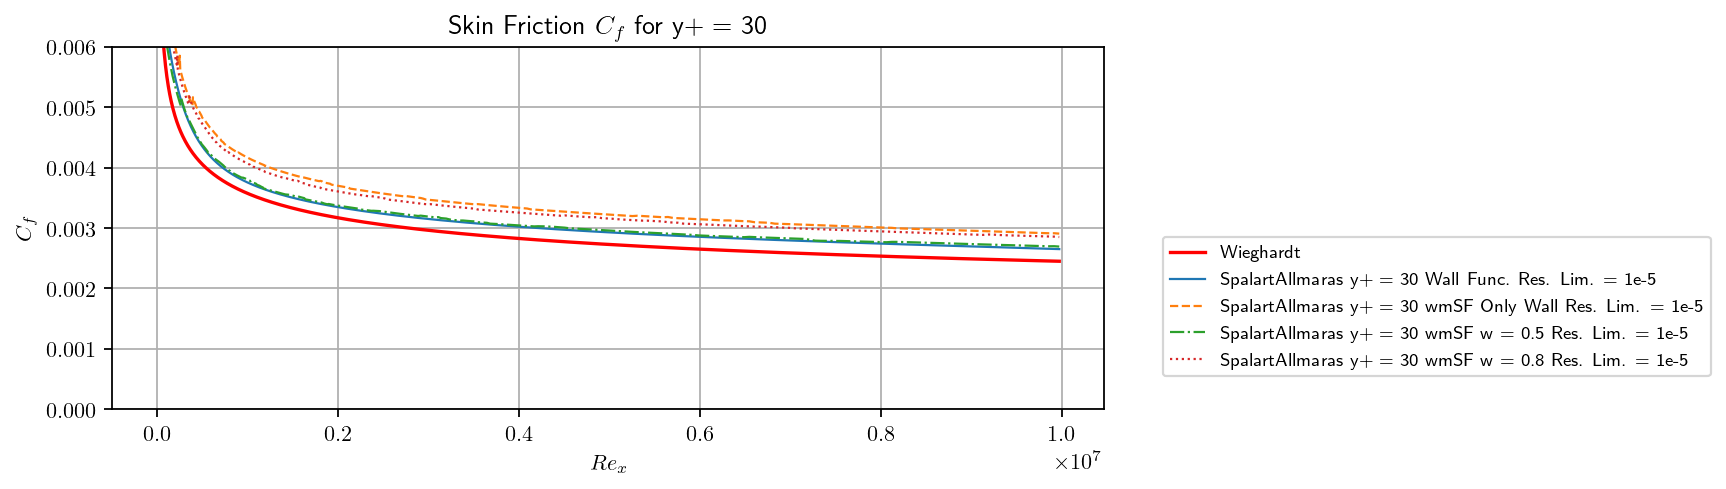

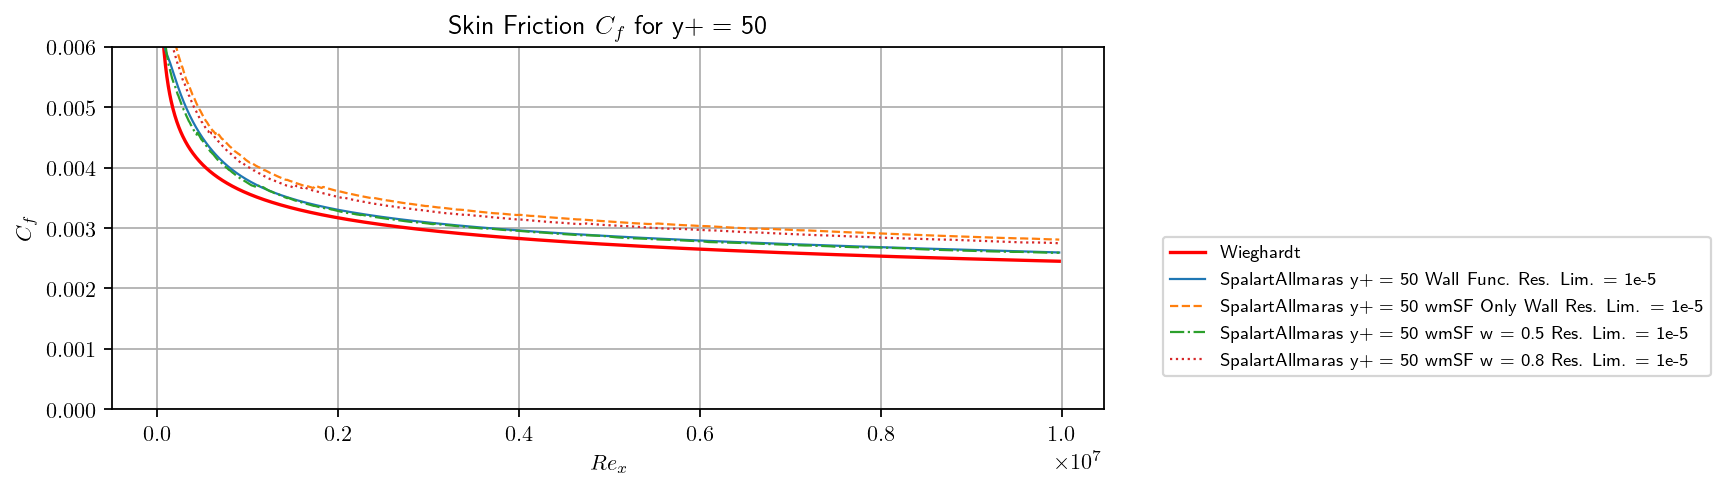

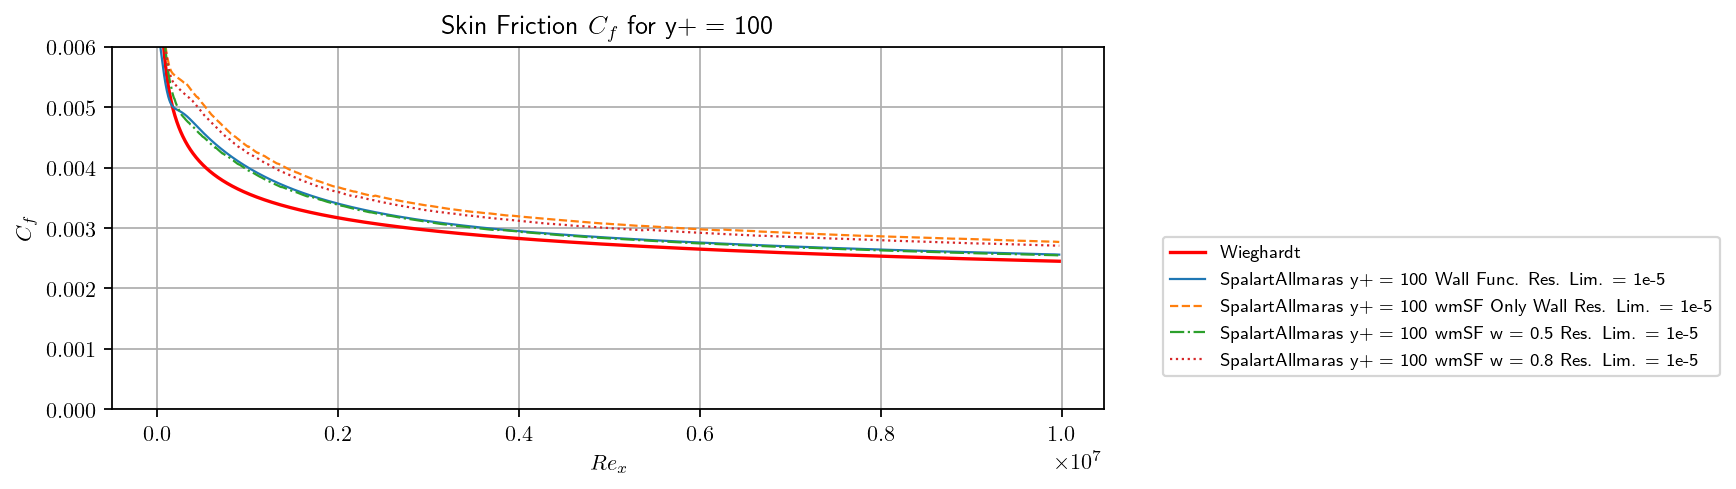

In [14]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
for j in range(len(yp)):
    fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax2.set_xlabel(r"$Re_x$")
    ax2.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Wall Func. Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style2[i], c = "C{:d}".format(i), lw = lw2)
        ax2.plot(Rex, Cf_onlywall[i + len(res_list)*j], label = "{} y+ = {} wmSF Only Wall Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style2[i+1], c = "C{:d}".format(i+1), lw = lw2)
        ax2.plot(Rex, Cf_5050[i + len(res_list)*j], label = "{} y+ = {} wmSF w = 0.5 Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style2[i+2], c = "C{:d}".format(i+2), lw = lw2)
        ax2.plot(Rex, Cf_8020[i + len(res_list)*j], label = "{} y+ = {} wmSF w = 0.8 Res. Lim. = 1e-5".format(model_sa, yp[j]), ls = style2[i+3], c = "C{:d}".format(i+3), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))